# Proyecto Final
## Luis David Huante
## Minería de datos
### A lunes 24 de junio de 2024

In [2]:
pip install mlxtend

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mlxtend.preprocessing import TransactionEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
file_path = 'marketing_campaign.csv'
data = pd.read_csv(file_path, delimiter='\t')
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Análisis exploratorio de datos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


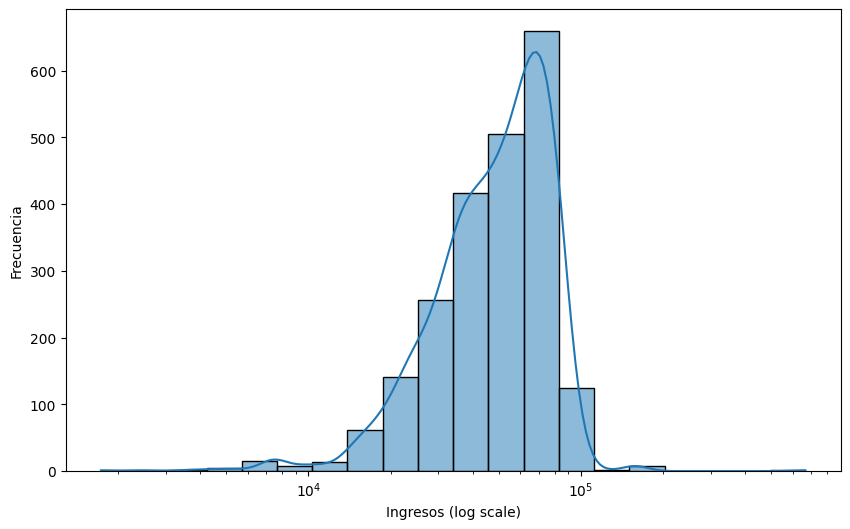

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Income'], bins=20, kde=True, log_scale=True)
plt.xlabel('Ingresos (log scale)')
plt.ylabel('Frecuencia')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


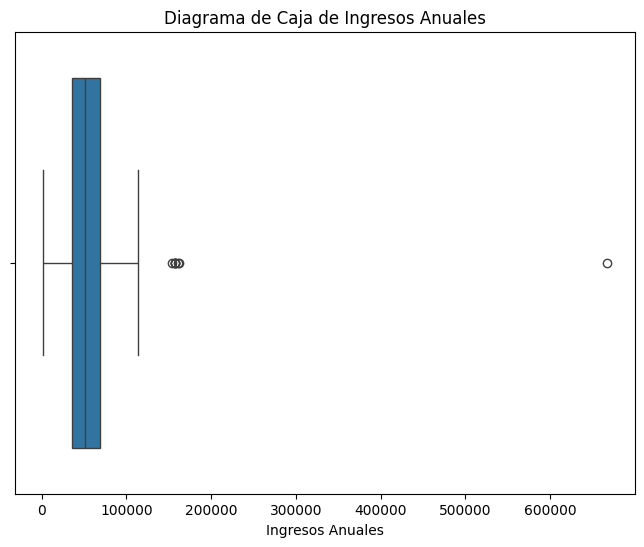

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Income'])
plt.title('Diagrama de caja de ingresos anuales')
plt.xlabel('Ingresos Anuales')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


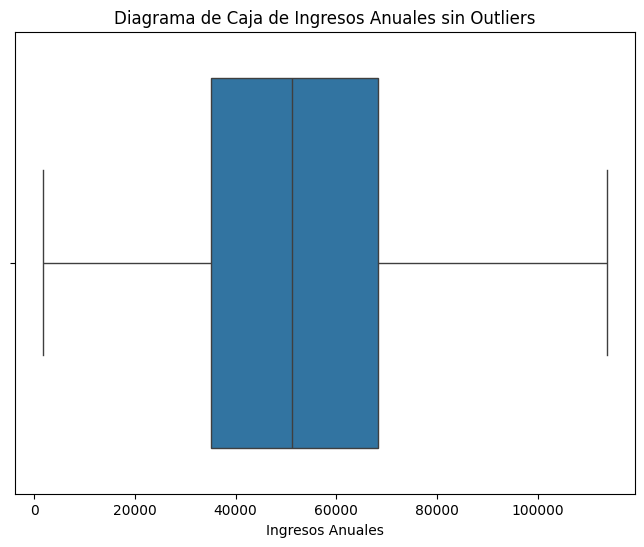

In [12]:
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_data = data[(data['Income'] >= lower_bound) & (data['Income'] <= upper_bound)]

# Crear figura
plt.figure(figsize=(8, 6))
sns.boxplot(x=filtered_data['Income'])
plt.title('Diagrama de caja de ingresos anuales sin outliers')
plt.xlabel('Ingresos Anuales')
plt.show()


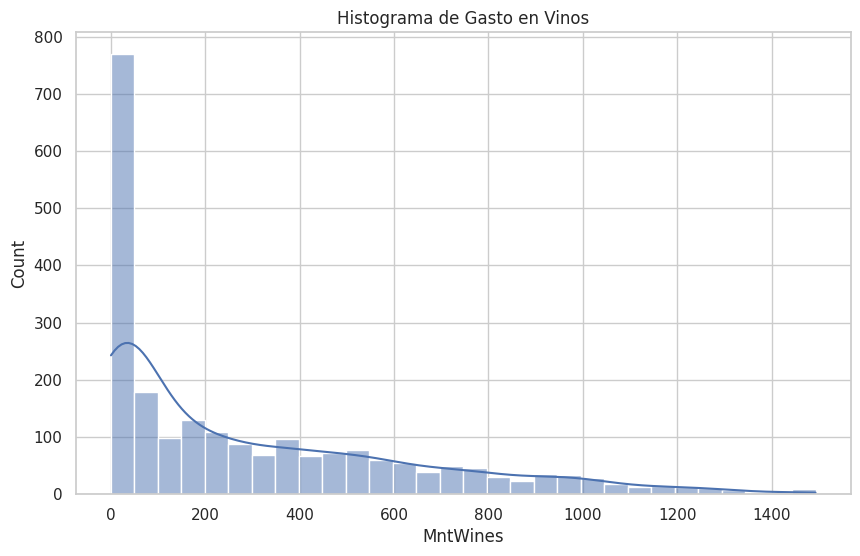

In [11]:
# Histograma de MntWines
plt.figure(figsize=(10, 6))
sns.histplot(data['MntWines'], bins=30, kde=True)
plt.title('Histograma de Gasto en Vinos')
plt.show()

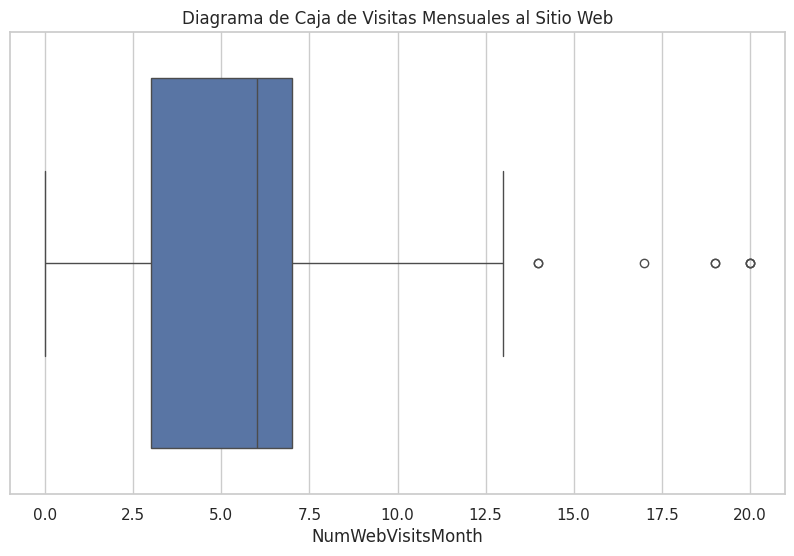

In [12]:
# Diagrama de caja de NumWebVisitsMonth
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['NumWebVisitsMonth'])
plt.title('Diagrama de Caja de Visitas Mensuales al Sitio Web')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


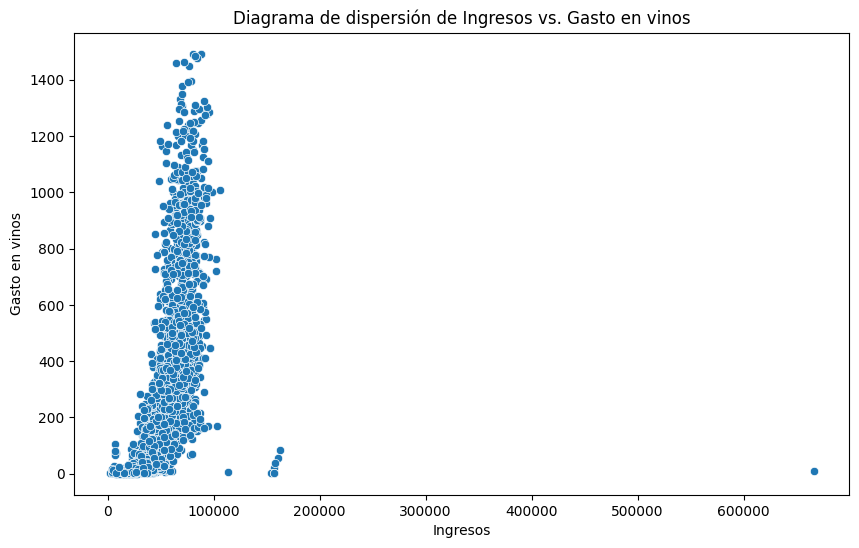

In [13]:
# Diagrama de dispersión de Ingresos vs. Gasto en Vinos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntWines', data=data)
plt.title('Diagrama de dispersión de Ingresos vs. Gasto en vinos')
plt.xlabel('Ingresos')
plt.ylabel('Gasto en vinos')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-17-68d65f556b16>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_income_by_education.index, y=median_income_by_education, palette='viridis')


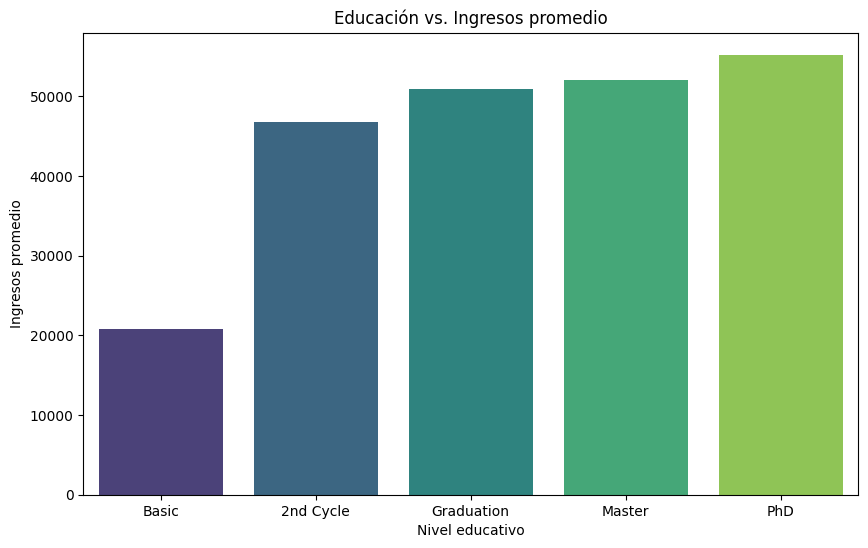

In [17]:
# Calculando ingresos medianos por nivel educativo
median_income_by_education = data.groupby('Education')['Income'].median().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=median_income_by_education.index, y=median_income_by_education, palette='viridis')
plt.title('Educación vs. Ingresos promedio')
plt.xlabel('Nivel educativo')
plt.ylabel('Ingresos promedio')
plt.xticks(ticks=range(len(median_income_by_education)), labels=['Basic', '2nd Cycle', 'Graduation', 'Master', 'PhD'])
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


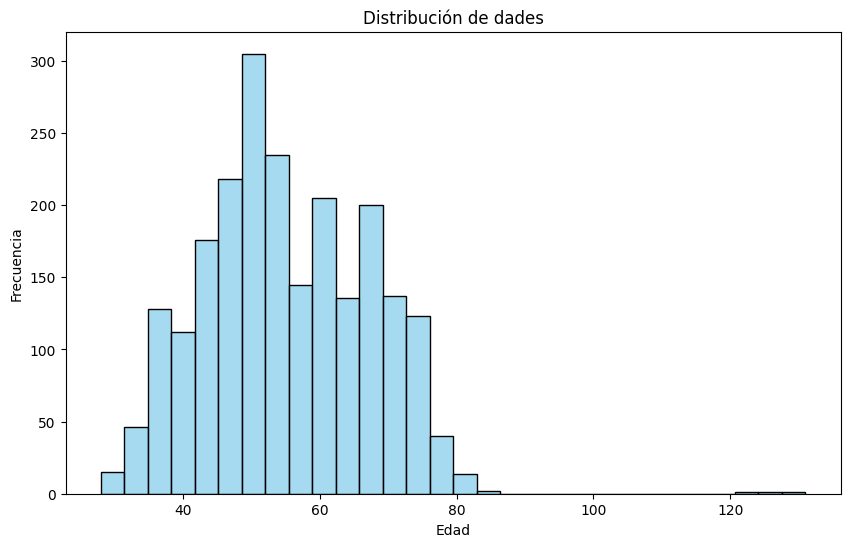

In [20]:
# Edad de los clientes
current_year = 2024
data['Age'] = current_year - data['Year_Birth']

# Histograma de edades
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, color='skyblue')
plt.title('Distribución de dades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-21-7fdeb11758bf>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_spent_by_marital_status.index, y=total_spent_by_marital_status, palette='coolwarm')


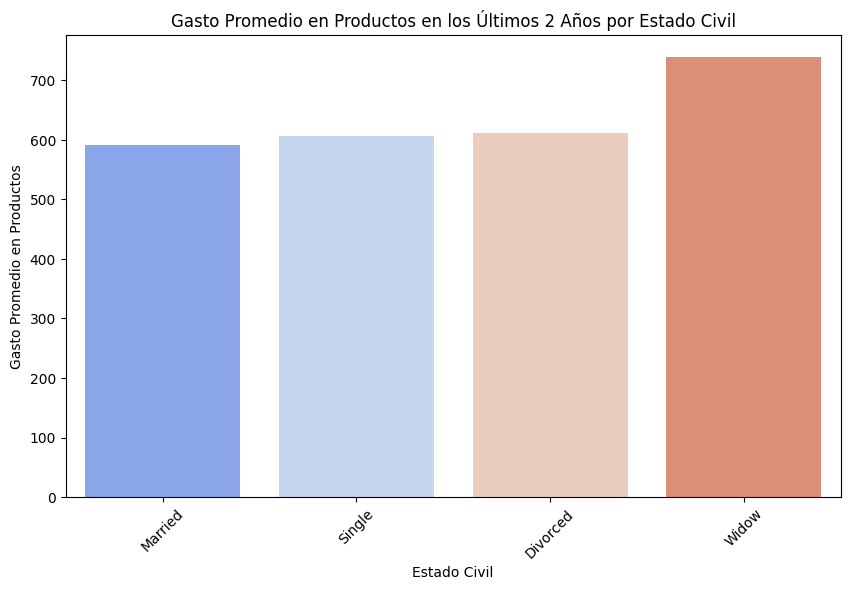

In [21]:
# Gasto total en productos
data['Total_Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + \
                      data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

filtered_data = data[~data['Marital_Status'].isin(['YOLO', 'Alone', 'Together', 'Absurd'])]
total_spent_by_marital_status = filtered_data.groupby('Marital_Status')['Total_Spent'].mean().sort_values()

# Gráfico de barras del gasto total en productos por estado civil
plt.figure(figsize=(10, 6))
sns.barplot(x=total_spent_by_marital_status.index, y=total_spent_by_marital_status, palette='coolwarm')
plt.title('Gasto Promedio en Productos en los Últimos 2 Años por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Gasto Promedio en Productos')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-22-8a8f15952599>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_spending.index, y=grouped_spending.values, palette="mako")


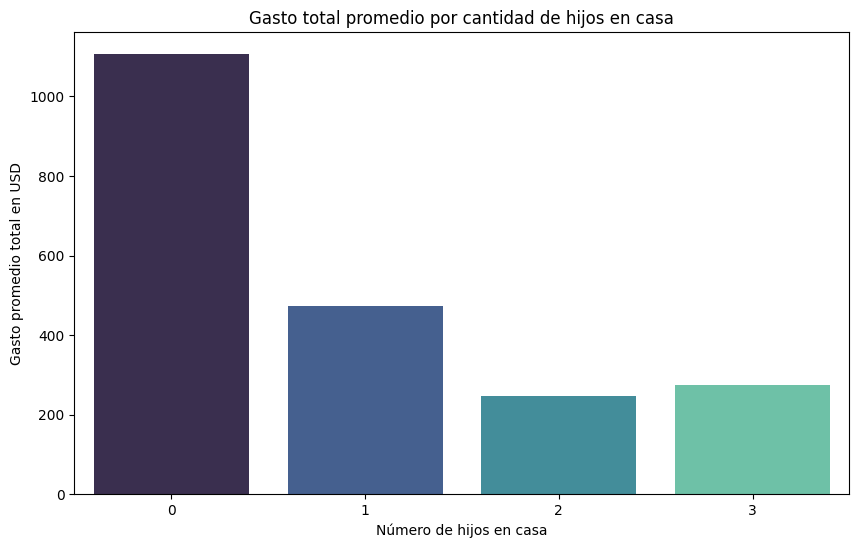

In [22]:
data['Total_Spending'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['Total_Children'] = data['Kidhome'] + data['Teenhome']
grouped_spending = data.groupby('Total_Children')['Total_Spending'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_spending.index, y=grouped_spending.values, palette="mako")
plt.title('Gasto total promedio por cantidad de hijos en casa')
plt.xlabel('Número de hijos en casa')
plt.ylabel('Gasto promedio total en USD')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


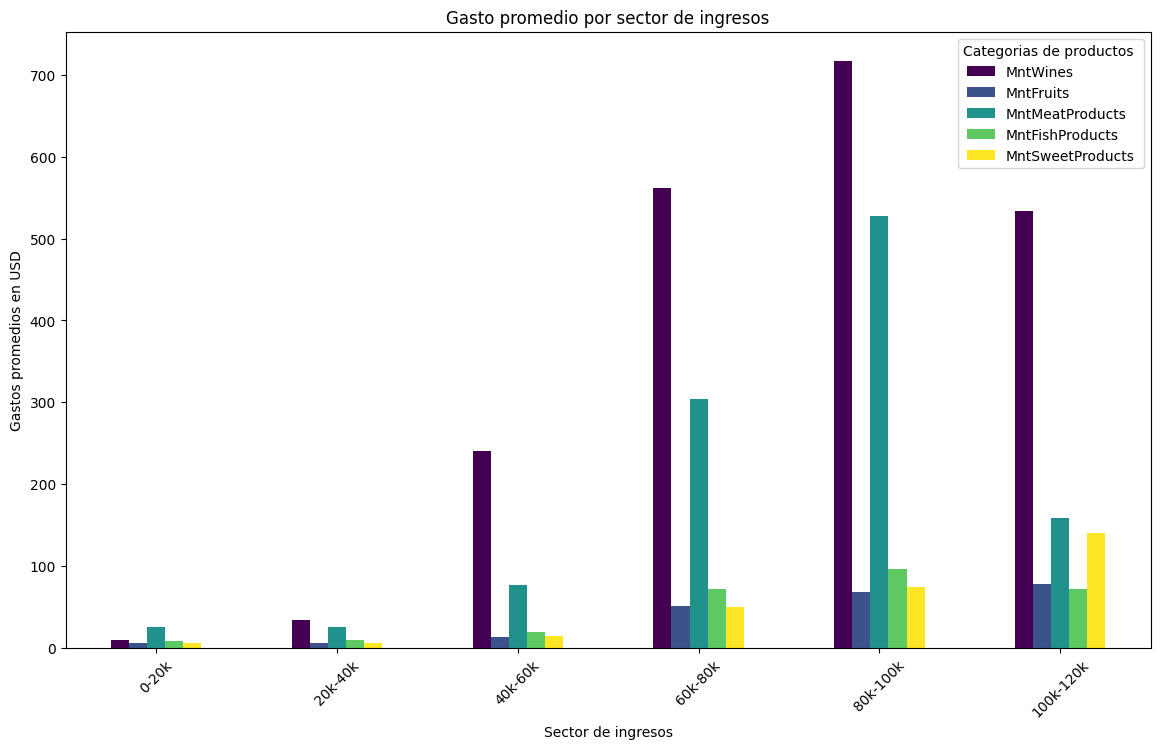

In [23]:
# Defining income brackets
income_bins = pd.cut(data['Income'], bins=[0, 20000, 40000, 60000, 80000, 100000, 120000], labels=['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k'])
data['Income_Bracket'] = income_bins

# Grouping data by income bracket and calculating average spending in each product category
spending_by_income = data.groupby('Income_Bracket')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].mean()

# Plotting the data
spending_by_income.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Gasto promedio por sector de ingresos')
plt.xlabel('Sector de ingresos')
plt.ylabel('Gastos promedios en USD')
plt.xticks(rotation=45)  # Rotates labels to make them readable
plt.legend(title='Categorias de productos ')
plt.show()


## Preprocesamiento de datos

In [26]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.drop(['ID', 'Z_CostContact', 'Z_Revenue'])
numeric_data = data[numeric_features]
imputer = SimpleImputer(strategy='median')
numeric_imputed = imputer.fit_transform(numeric_data)
numeric_data_imputed = pd.DataFrame(numeric_imputed, columns=numeric_data.columns)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
numeric_data_imputed.isna().sum()

(Year_Birth              0
 Income                 24
 Kidhome                 0
 Teenhome                0
 Recency                 0
 MntWines                0
 MntFruits               0
 MntMeatProducts         0
 MntFishProducts         0
 MntSweetProducts        0
 MntGoldProds            0
 NumDealsPurchases       0
 NumWebPurchases         0
 NumCatalogPurchases     0
 NumStorePurchases       0
 NumWebVisitsMonth       0
 AcceptedCmp3            0
 AcceptedCmp4            0
 AcceptedCmp5            0
 AcceptedCmp1            0
 AcceptedCmp2            0
 Complain                0
 Response                0
 Total_Spent             0
 Age                     0
 dtype: int64,
 Year_Birth             0
 Income                 0
 Kidhome                0
 Teenhome               0
 Recency                0
 MntWines               0
 MntFruits              0
 MntMeatProducts        0
 MntFishProducts        0
 MntSweetProducts       0
 MntGoldProds           0
 NumDealsPurchases      

## PCA: Principal Component Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


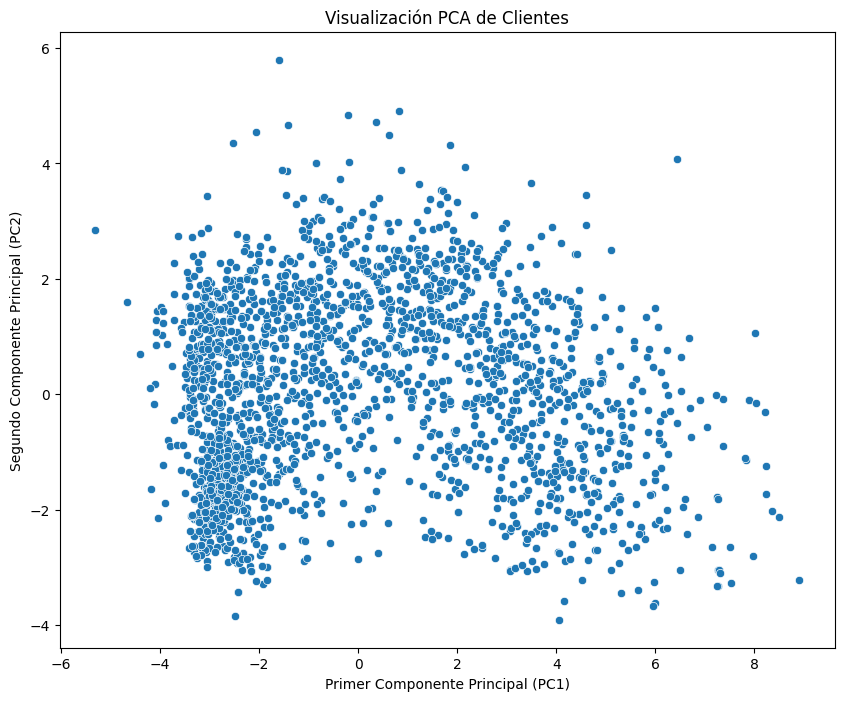

(array([0.32227505, 0.09942848]), array([0.32227505, 0.42170353]))

In [27]:
# Escalar datos
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_data_imputed)

# PCA
pca = PCA(n_components=2)  # Reducir a dos dimensiones para visualización
principal_components = pca.fit_transform(numeric_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualización
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('Visualización PCA de Clientes')
plt.xlabel('Primer Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.show()

# Varianza
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = pca.explained_variance_ratio_.cumsum()

explained_variance, explained_variance_cumulative

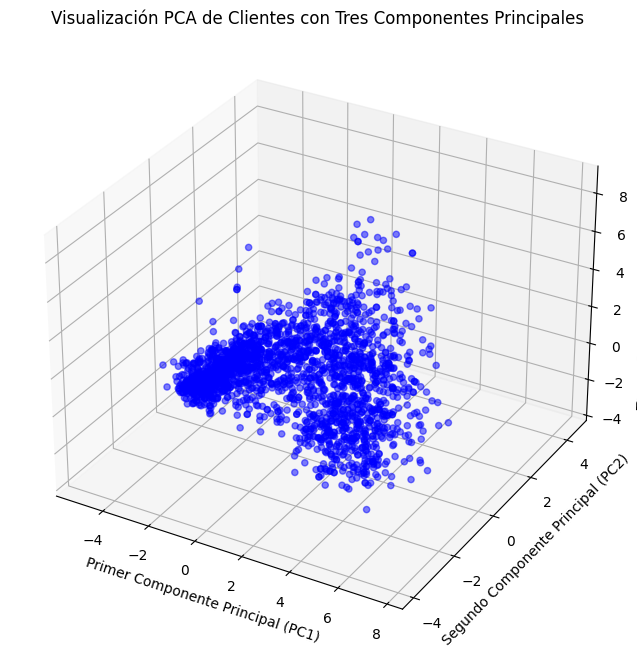

(array([0.28326689, 0.08797341, 0.08235675]),
 array([0.28326689, 0.3712403 , 0.45359705]))

In [9]:
pca_3 = PCA(n_components=3)
principal_components_3 = pca_3.fit_transform(numeric_scaled)

pca_3_df = pd.DataFrame(data=principal_components_3, columns=['PC1', 'PC2', 'PC3'])

# Visualizamoss los tres componentes principales en una gráfica 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3_df['PC1'], pca_3_df['PC2'], pca_3_df['PC3'], c='blue', alpha=0.5)
ax.set_title('Visualización PCA de Clientes con Tres Componentes Principales')
ax.set_xlabel('Primer Componente Principal (PC1)')
ax.set_ylabel('Segundo Componente Principal (PC2)')
ax.set_zlabel('Tercer Componente Principal (PC3)')
plt.show()

# Varianza para tres componentes
explained_variance_3 = pca_3.explained_variance_ratio_
explained_variance_cumulative_3 = pca_3.explained_variance_ratio_.cumsum()

explained_variance_3, explained_variance_cumulative_3


## Clustering

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


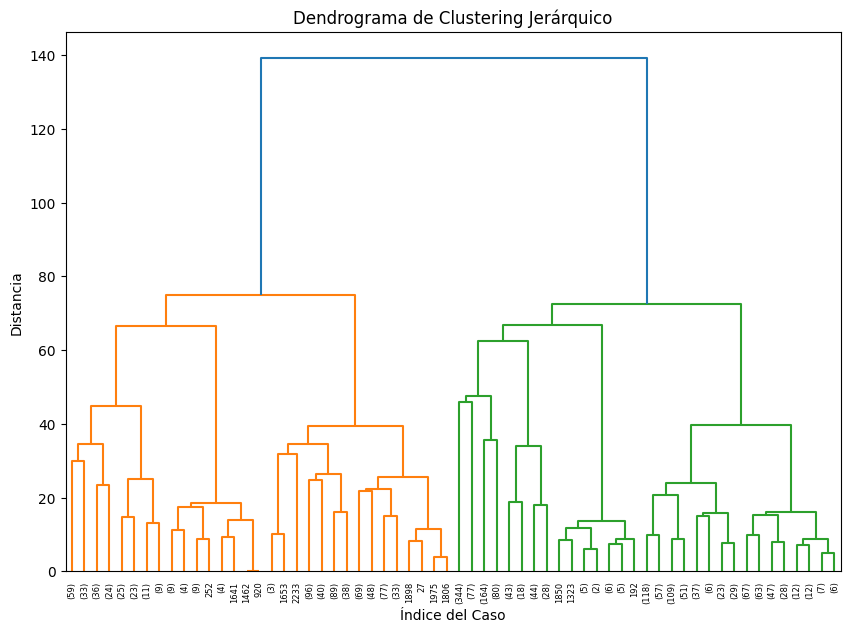

In [44]:
linked = linkage(numeric_scaled, method='ward', )

# Dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=list(data.index),
           distance_sort='descending',
           show_leaf_counts=True, truncate_mode='level', p=5)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índice del Caso')
plt.ylabel('Distancia')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


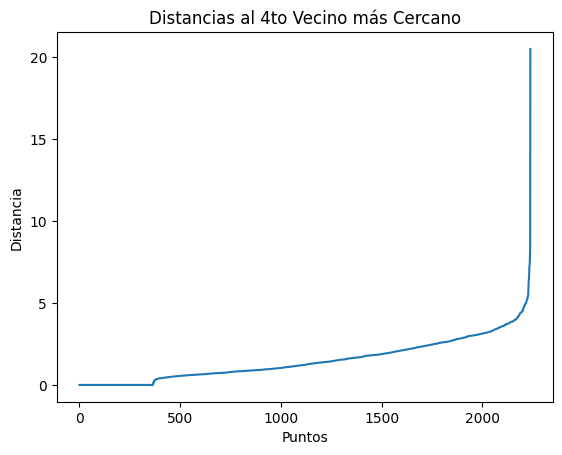

In [52]:
neighbors = NearestNeighbors(n_neighbors=5)  # 'min_samples-1' si min_samples es 5
neighbors_fit = neighbors.fit(numeric_scaled)
distances, indices = neighbors_fit.kneighbors(numeric_scaled)

# Ordenar y plotear las distancias
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.title('Distancias al 4to Vecino más Cercano')
plt.xlabel('Puntos')
plt.ylabel('Distancia')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Etiquetas únicas de los clústeres: [-1  0  1  2]


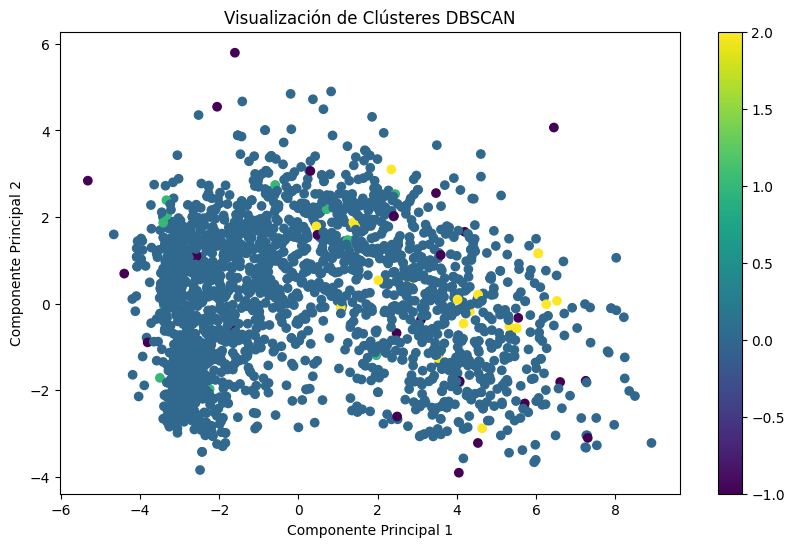

In [29]:
# Parámetros del DBSCAN
dbscan = DBSCAN(eps=6, min_samples=5)
clusters = dbscan.fit_predict(numeric_scaled)

# Resultados
unique_labels = np.unique(clusters)
print(f"Etiquetas únicas de los clústeres: {unique_labels}")

# Visualización de los clústeres
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(numeric_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', label=clusters)
plt.title('Visualización de Clústeres DBSCAN')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

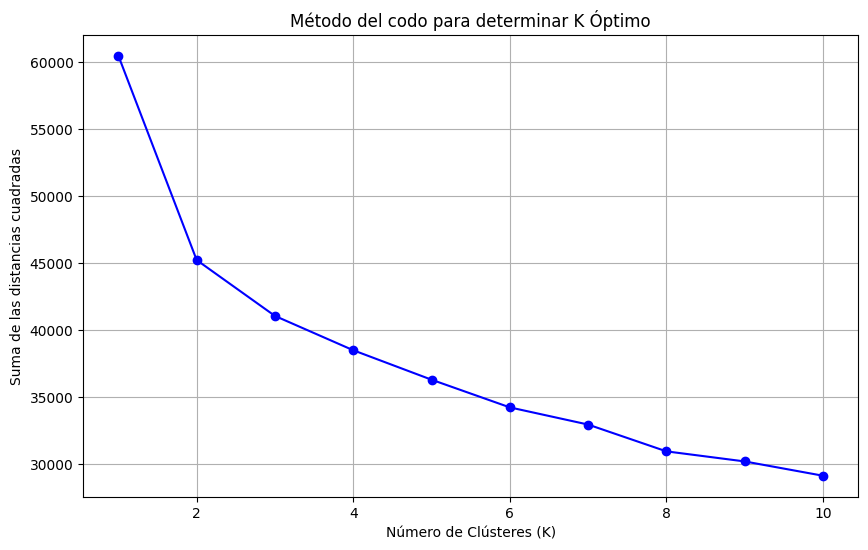

In [30]:
# Clústeres a evaluar
k_range = range(1, 11)
sum_of_squared_distances = []

# Distancias cuadradas para diferentes valores de K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numeric_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sum_of_squared_distances, 'bo-')
plt.title('Método del codo para determinar K Óptimo')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Suma de las distancias cuadradas')
plt.grid(True)
plt.show()


### Silhouette Score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

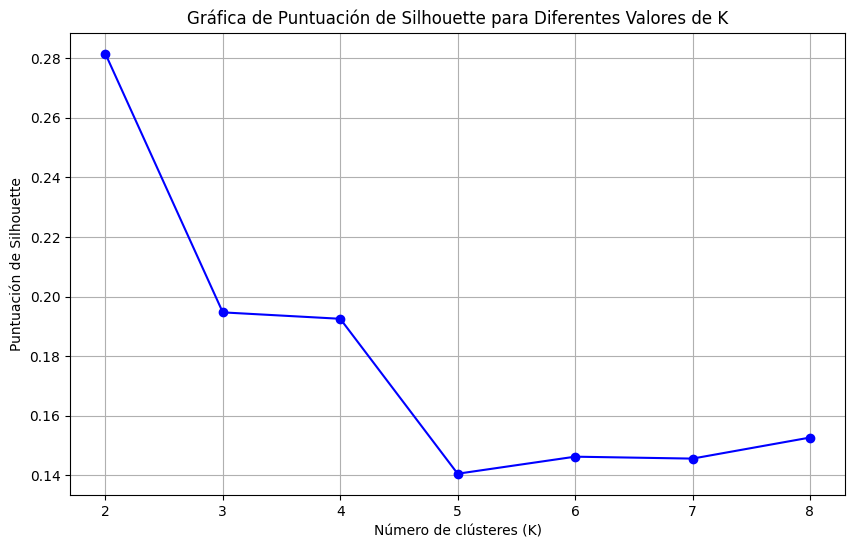

In [31]:
k_range_silhouette = range(2, 9)
silhouette_scores = []

for k in k_range_silhouette:
    kmeans_silhouette = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans_silhouette.fit_predict(numeric_scaled)
    silhouette_avg = silhouette_score(numeric_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Puntuación Silhouette
plt.figure(figsize=(10, 6))
plt.plot(k_range_silhouette, silhouette_scores, 'bo-')
plt.title('Gráfica de Puntuación de Silhouette para Diferentes Valores de K')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Puntuación de Silhouette')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


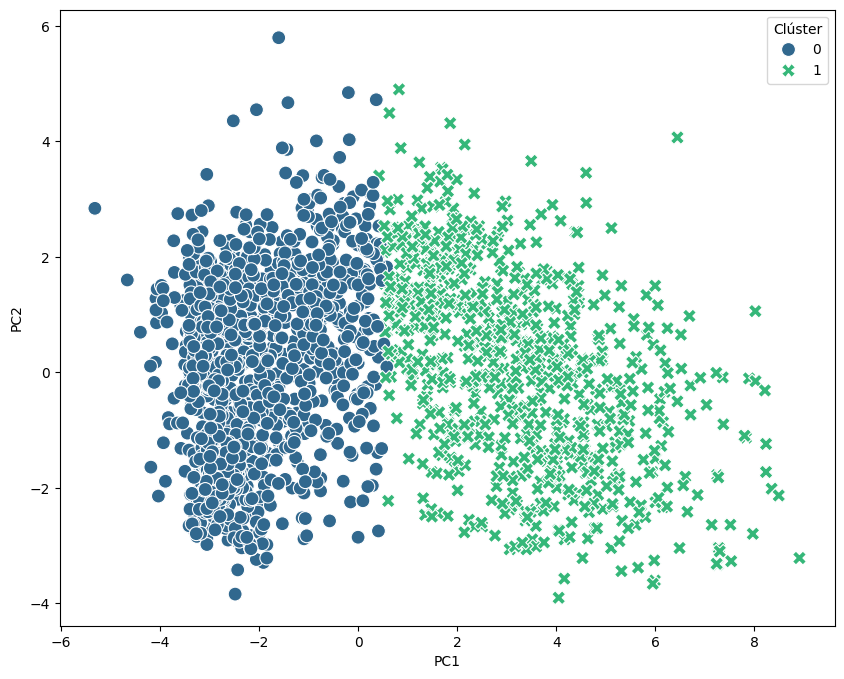

In [32]:
# K-means con 2 clústeres
optimal_k = 2
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_final.fit_predict(numeric_scaled)
data['Cluster'] = clusters

# Visualizción
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=data['Cluster'], palette='viridis', style=data['Cluster'], s=100)
plt.legend(title='Clúster')
plt.show()


In [13]:
# Variables para cada clúster
cluster_summary = data.groupby('Cluster').agg({
    'Income': 'mean',
    'MntWines': 'mean',
    'MntMeatProducts': 'mean',
    'NumWebVisitsMonth': 'mean',
    'NumDealsPurchases': 'mean',
    'NumWebPurchases': 'mean',
    'NumCatalogPurchases': 'mean',
    'NumStorePurchases': 'mean'
}).reset_index()

cluster_summary

,Cluster,Income,MntWines,MntMeatProducts,NumWebVisitsMonth,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,0,39164.347212,107.740632,38.158707,6.391624,2.541514,2.985305,0.908156,4.000735
1,1,72449.898967,607.714448,366.364050,3.651877,1.989761,5.787258,5.377702,8.560865


In [28]:
# Supongamos que consideramos un gasto mayor a $50 como significativo para la compra de un producto
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
transactions = []

for i in range(len(data)):
    transaction = []
    for product in products:
        if data.loc[i, product] > 50:
            transaction.append(product)
    transactions.append(transaction)

# TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

df_transactions.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,False,False,True,False,True
3,False,False,False,False,False,False
4,False,False,False,True,False,True


In [29]:
binary_data = data[products].applymap(lambda x: 1 if x > 50 else 0)
frequent_itemsets = apriori(binary_data, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
frequent_itemsets.sort_values(by='support', ascending=False).head(), rules.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


(     support                     itemsets
 0   0.654911                   (MntWines)
 2   0.549107            (MntMeatProducts)
 7   0.533482  (MntWines, MntMeatProducts)
 5   0.276339               (MntGoldProds)
 10  0.269643     (MntWines, MntGoldProds),
          antecedents        consequents  antecedent support  \
 0         (MntWines)        (MntFruits)            0.654911   
 1        (MntFruits)         (MntWines)            0.175893   
 2         (MntWines)  (MntMeatProducts)            0.654911   
 3  (MntMeatProducts)         (MntWines)            0.549107   
 4         (MntWines)  (MntFishProducts)            0.654911   
 
    consequent support   support  confidence      lift  leverage  conviction  \
 0            0.175893  0.174554    0.266530  1.515299  0.059359    1.123574   
 1            0.654911  0.174554    0.992386  1.515299  0.059359   45.321726   
 2            0.549107  0.533482    0.814588  1.483477  0.173866    2.431838   
 3            0.654911  0.533482   

In [35]:
additional_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
binary_data = data[additional_columns].applymap(lambda x: 1 if x > 0 else 0)
frequent_itemsets = apriori(binary_data, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2).head(10)
rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(AcceptedCmp1),(NumWebPurchases),0.064286,0.978125,0.064286,1.000000,1.022364,0.001406,inf,0.023378
9,(AcceptedCmp5),(NumWebPurchases),0.072768,0.978125,0.072768,1.000000,1.022364,0.001592,inf,0.023592
3,(NumWebPurchases),(NumStorePurchases),0.978125,0.993304,0.975893,0.997718,1.004444,0.004318,2.934375,0.202261
8,(AcceptedCmp4),(NumWebPurchases),0.074554,0.978125,0.074107,0.994012,1.016242,0.001184,3.653125,0.017270
7,(AcceptedCmp3),(NumWebPurchases),0.072768,0.978125,0.072321,0.993865,1.016092,0.001145,3.565625,0.017080
0,(NumCatalogPurchases),(NumWebPurchases),0.738393,0.978125,0.733036,0.992745,1.014947,0.010795,3.015104,0.056293
5,(NumWebPurchases),(NumDealsPurchases),0.978125,0.979464,0.961161,0.982656,1.003259,0.003122,1.184046,0.148497
2,(NumStorePurchases),(NumWebPurchases),0.993304,0.978125,0.975893,0.982472,1.004444,0.004318,1.247997,0.660720
4,(NumDealsPurchases),(NumWebPurchases),0.979464,0.978125,0.961161,0.981313,1.003259,0.003122,1.170579,0.158182
1,(NumWebPurchases),(NumCatalogPurchases),0.978125,0.738393,0.733036,0.749429,1.014947,0.010795,1.044046,0.673221


In [40]:
print(rules)

             antecedents            consequents  antecedent support  \
0  (NumCatalogPurchases)      (NumWebPurchases)            0.738393   
1      (NumWebPurchases)  (NumCatalogPurchases)            0.978125   
2    (NumStorePurchases)      (NumWebPurchases)            0.993304   
3      (NumWebPurchases)    (NumStorePurchases)            0.978125   
4    (NumDealsPurchases)      (NumWebPurchases)            0.979464   
5      (NumWebPurchases)    (NumDealsPurchases)            0.978125   
6         (AcceptedCmp1)      (NumWebPurchases)            0.064286   
7         (AcceptedCmp3)      (NumWebPurchases)            0.072768   
8         (AcceptedCmp4)      (NumWebPurchases)            0.074554   
9         (AcceptedCmp5)      (NumWebPurchases)            0.072768   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.978125  0.733036    0.992745  1.014947  0.010795    3.015104   
1            0.738393  0.733036    0.749429  1.014947  0.010

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
